## nltools

See: 
 - https://nltools.org/auto_examples/02_Analysis/plot_univariate_regression.html#sphx-glr-auto-examples-02-analysis-plot-univariate-regression-py
 - https://nltools.org/auto_examples/02_Analysis/plot_multivariate_prediction.html#sphx-glr-auto-examples-02-analysis-plot-multivariate-prediction-py
 - https://nltools.org/auto_examples/02_Analysis/plot_multivariate_prediction.html#sphx-glr-auto-examples-02-analysis-plot-multivariate-prediction-py
 
 Generally the multivariate prediction module implements sklearn.
 
 According to the website, leverages nilearn and sklearn.

In [1]:
from nltools.datasets import fetch_pain

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
data = fetch_pain()
data.Y = data.X['PainLevel']

#### Univariate

In [3]:
metadata = data.X.copy()
subject_id = metadata['SubjectID']

In [7]:
from nltools.data import Brain_Data
import numpy as np
import pandas as pd

all_sub = Brain_Data()
for s in subject_id.unique():
    sdat = data[np.where(metadata['SubjectID']==s)[0]]
    sdat.X = pd.DataFrame(data={'Intercept':np.ones(sdat.shape()[0]),'Pain':sdat.X['PainLevel'].astype(int)})
    stats = sdat.regress()
    all_sub = all_sub.append(stats['beta'][1])

#### Multivariate

In [8]:
data.Y = data.Y.astype(int)

The dataset contains 3 images per subject.

In [13]:
data.X.SubjectID.value_counts().value_counts()

3    28
Name: SubjectID, dtype: int64

In [24]:
data.X.loc[data.X.SubjectID==data.X.SubjectID[0]].transpose()

,0,1,2
url,https://neurovault.org/images/7509/,https://neurovault.org/images/7510/,https://neurovault.org/images/7511/
id,7509,7510,7511
file,https://neurovault.org/media/images/504/Pain_S...,https://neurovault.org/media/images/504/Pain_S...,https://neurovault.org/media/images/504/Pain_S...
collection,https://neurovault.org/collections/504/,https://neurovault.org/collections/504/,https://neurovault.org/collections/504/
collection_id,504,504,504
file_size,1207412,1213430,1209257
cognitive_paradigm_cogatlas,phasic pain stimulation,phasic pain stimulation,phasic pain stimulation
cognitive_paradigm_cogatlas_id,trm_4e6114e7b1ff2,trm_4e6114e7b1ff2,trm_4e6114e7b1ff2
cognitive_contrast_cogatlas,NaN,NaN,NaN
cognitive_contrast_cogatlas_id,NaN,NaN,NaN


In [26]:
data.X.PainLevel.value_counts()

3    28
2    28
1    28
Name: PainLevel, dtype: int64

...and there is one PainLevel for each subject. OK. so that's one model you can use...

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=False, random_state=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 0.56
overall CV Correlation: 0.74


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


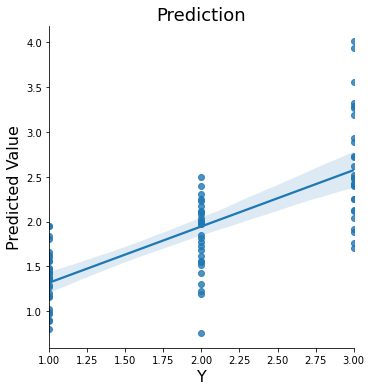

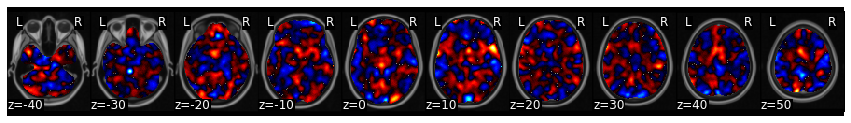

In [9]:
stats = data.predict(
    algorithm='linear',
    cv_dict={'type': 'kfolds','n_folds': 5,'stratified':data.Y.astype(int)}
)

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=False, random_state=None as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


overall Root Mean Squared Error: 0.00
overall Correlation: 1.00
overall CV Root Mean Squared Error: 0.56
overall CV Correlation: 0.74


/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


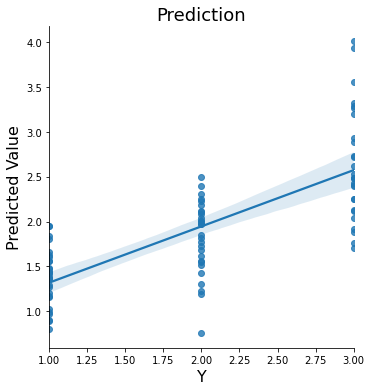

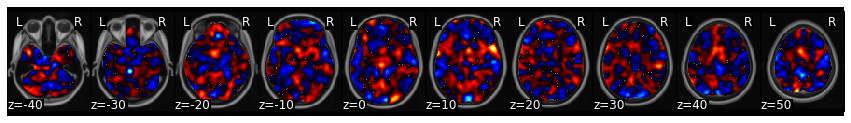

In [28]:
stats = data.predict(
    algorithm='ridge',
    cv_dict={'type': 'kfolds','n_folds': 5,'stratified':data.Y.astype(int)}
)

So we have a 'predicted value' form these regressions. I wonder how the folds system works? How does ths stratification feature work?

This is used by `cv = set_cv(Y=self.Y, cv_dict=cv_dict)`

code for `set_cv` is in https://github.com/cosanlab/nltools/blob/9a617484a03c326766ddd99684f1cb4d1eafaf98/nltools/cross_validation.py:

Stratified K Fold is designed to 'Generate test sets such that all contain the same distribution of classes, or as close as possible.'

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

GroupKFold is designed to ensure the same group will not appear in different folds

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html

So:
 - We use the StratifiedKFold to ensure that classes of different classifications are distributed evenly over folds
 - We use GroupKFold to ensure that groups don't appear across folds.

We could then fairly straightforwardly include multiple exemplars from the same subject.

Because cross-validation is built in, the above code does not actually give us a neural signature, but it does give us an estimate of the predictive value of the neural signature across the sample.

overall Root Mean Squared Error: 0.00
overall Correlation: 1.00


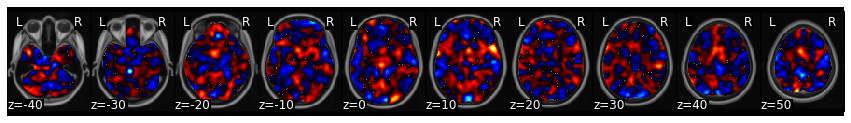

In [31]:
stats = data.predict(
    algorithm='ridge',
    cv_dict=None
)

To get that, I suppose we just use data.predict as a final estimate.

In [34]:
stats['yfit_all']

array([2.9999118, 1.0004103, 1.9998962, 3.0002217, 1.0001267, 1.9997376,
       3.0000296, 1.00015  , 1.9998206, 3.0001388, 0.9998296, 1.9998138,
       3.000021 , 1.0001088, 1.9998033, 2.9999685, 1.0003192, 1.999632 ,
       2.9999614, 1.0000584, 1.999949 , 2.999806 , 1.000412 , 1.9996544,
       3.0000958, 0.9999976, 1.9999925, 2.9998536, 1.000202 , 1.9999677,
       2.999578 , 1.000035 , 2.0000157, 3.0000968, 1.0001268, 1.9999269,
       3.0001116, 1.0002729, 1.9998572, 2.9998107, 1.0002072, 2.0002272,
       2.9998598, 1.0001676, 1.9999826, 3.000053 , 1.0001513, 1.999919 ,
       2.9996824, 1.000014 , 2.0000658, 2.9996266, 1.00047  , 1.9995865,
       2.9997625, 0.9998894, 2.0003805, 2.999514 , 1.0010136, 1.999541 ,
       2.999681 , 1.0005078, 1.9997576, 2.9996881, 1.0003446, 1.9996344,
       2.9996457, 1.0001951, 2.00001  , 2.9997663, 1.0001575, 2.000235 ,
       2.9999623, 1.0004748, 1.9998014, 2.9999576, 1.0002292, 2.0000777,
       2.999929 , 1.0001252, 1.999908 , 2.9998336, 

So this is obviously overfit....